In [21]:
import pickle
import json
import numpy as np

In [41]:
with open('/srv/datasets2/recipe1m+/food.com_data_rescaled/nutr/food.com_nutr_g_per_recipe.json') as f:
    nutr_per_recipes = json.load(f)

In [42]:
# top k

def pred_nutr(top_k: int):

    gts = {
        'energy': [],
        'fat': [],
        'carb': [],
        'protein': [],
    }
    preds = {
        'energy': [],
        'fat': [],
        'carb': [],
        'protein': [],
    }
    absolute_errors = {
        'energy': [],
        'fat': [],
        'carb': [],
        'protein': [],
    }
    percentage_errors = {
        'energy': [],
        'fat': [],
        'carb': [],
        'protein': [],
    }

    for recipe_id, results in im2recipe_dict.items():
        top_k_results = results[:top_k]
        gt_nutr = nutr_per_recipes[recipe_id]
        pred_nutr = {}
        for nutr_name in gts.keys():
            pred_nutr[nutr_name] = sum([nutr_per_recipes[result][nutr_name] for result in top_k_results]) / top_k
        for nutr_name in gts.keys():
            gts[nutr_name].append(gt_nutr[nutr_name])
            preds[nutr_name].append(pred_nutr[nutr_name])
            absolute_errors[nutr_name].append(abs(pred_nutr[nutr_name] - gt_nutr[nutr_name]))
            if gt_nutr[nutr_name] < 0.1:
                percentage_errors[nutr_name].append(0)
            else:
                percentage_errors[nutr_name].append(abs(pred_nutr[nutr_name] - gt_nutr[nutr_name])/gt_nutr[nutr_name])
    return gts, preds, absolute_errors, percentage_errors

In [58]:
path = 'results/deep_nutr_vlp/base/food_test_recipe_img.json'
with open(path) as f:
    im2recipe_dict = json.load(f)

In [59]:
#top1
gts, preds, absolute_errors, percentage_errors = pred_nutr(1)
all_mape = []
for nutr_name in gts.keys():
    mae = sum(absolute_errors[nutr_name])/len(absolute_errors[nutr_name])
    mape = sum(percentage_errors[nutr_name])/len(percentage_errors[nutr_name])
    m = np.array(gts[nutr_name]).mean()
    se = sum(np.abs(np.array(gts[nutr_name]) - m))/(len(gts[nutr_name]))
    print(f'{nutr_name}: MAE = {mae:.02f}, MAPE = {mape:.02f}, SE = {se:.02f}')
    all_mape.append(mape)
print(f'{sum(all_mape)/4:.02f}')
#toop5
gts, preds, absolute_errors, percentage_errors = pred_nutr(5)
all_mape = []
for nutr_name in gts.keys():
    mae = sum(absolute_errors[nutr_name])/len(absolute_errors[nutr_name])
    mape = sum(percentage_errors[nutr_name])/len(percentage_errors[nutr_name])
    m = np.array(gts[nutr_name]).mean()
    se = sum(np.abs(np.array(gts[nutr_name]) - m))/(len(gts[nutr_name]))
    print(f'{nutr_name}: MAE = {mae:.02f}, MAPE = {mape:.02f}, SE = {se:.02f}')
    all_mape.append(mape)
print(f'{sum(all_mape)/4:.02f}')
#top10
gts, preds, absolute_errors, percentage_errors = pred_nutr(10)
all_mape = []
for nutr_name in gts.keys():
    mae = sum(absolute_errors[nutr_name])/len(absolute_errors[nutr_name])
    mape = sum(percentage_errors[nutr_name])/len(percentage_errors[nutr_name])
    m = np.array(gts[nutr_name]).mean()
    se = sum(np.abs(np.array(gts[nutr_name]) - m))/(len(gts[nutr_name]))
    print(f'{nutr_name}: MAE = {mae:.02f}, MAPE = {mape:.02f}, SE = {se:.02f}')
    all_mape.append(mape)
print(f'{sum(all_mape)/4:.02f}')

energy: MAE = 67.30, MAPE = 0.44, SE = 100.39
fat: MAE = 6.30, MAPE = 1.78, SE = 7.14
carb: MAE = 8.32, MAPE = 0.81, SE = 15.99
protein: MAE = 2.67, MAPE = 0.74, SE = 3.84
0.94
energy: MAE = 56.73, MAPE = 0.38, SE = 100.39
fat: MAE = 5.29, MAPE = 1.63, SE = 7.14
carb: MAE = 7.24, MAPE = 0.77, SE = 15.99
protein: MAE = 2.30, MAPE = 0.66, SE = 3.84
0.86
energy: MAE = 55.72, MAPE = 0.38, SE = 100.39
fat: MAE = 5.14, MAPE = 1.70, SE = 7.14
carb: MAE = 7.15, MAPE = 0.77, SE = 15.99
protein: MAE = 2.25, MAPE = 0.66, SE = 3.84
0.88


0.7479
0.5756
0.8052
0.6828


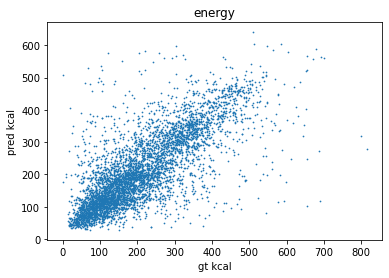

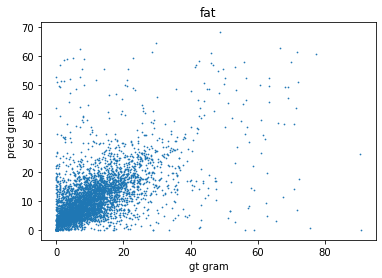

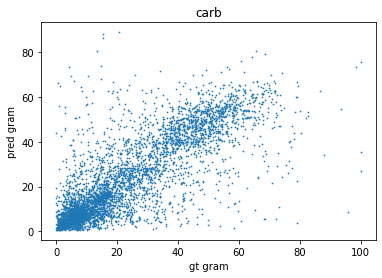

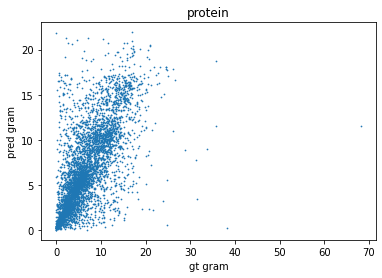

In [20]:
import matplotlib.pyplot as plt

for nutr_name in gts.keys():
    cc = np.corrcoef(gts[nutr_name],preds[nutr_name])[0,1]
    print(f'{cc:.04f}')
    plt.figure()
    plt.scatter(gts[nutr_name],preds[nutr_name],s=0.5)
    if nutr_name == 'energy':
        plt.xlabel('gt kcal')
        plt.ylabel('pred kcal')
    else:
        plt.xlabel('gt gram')
        plt.ylabel('pred gram')
    plt.title(nutr_name)

In [17]:
# top 5

import numpy as np
gts, preds, absolute_errors, percentage_errors = pred_nutr(5)
all_mape = []
for nutr_name in gts.keys():
    mae = sum(absolute_errors[nutr_name])/len(absolute_errors[nutr_name])
    mape = sum(percentage_errors[nutr_name])/len(percentage_errors[nutr_name])
    m = np.array(gts[nutr_name]).mean()
    se = sum(np.abs(np.array(gts[nutr_name]) - m))/(len(gts[nutr_name]))
    print(f'{nutr_name}: MAE = {mae:.02f}, MAPE = {mape:.02f}, SE = {se:.02f}')
    all_mape.append(mape)
print(f'{sum(all_mape)/4:.02f}')

energy: MAE = 57.54, MAPE = 0.39, SE = 100.39
fat: MAE = 5.29, MAPE = 1.82, SE = 7.14
carb: MAE = 7.49, MAPE = 0.87, SE = 15.99
protein: MAE = 2.36, MAPE = 0.71, SE = 3.84
0.95


0.7445
0.5706
0.8040
0.6636


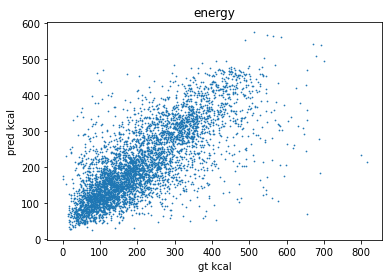

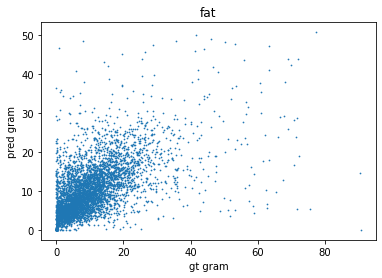

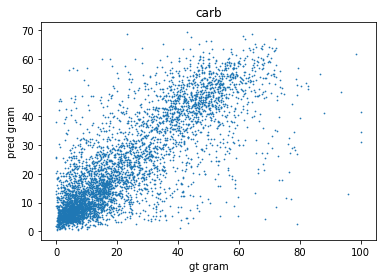

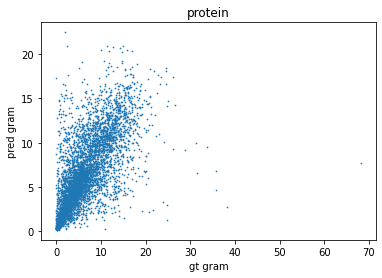

In [18]:
import matplotlib.pyplot as plt

for nutr_name in gts.keys():
    cc = np.corrcoef(gts[nutr_name],preds[nutr_name])[0,1]
    print(f'{cc:.04f}')
    plt.figure()
    plt.scatter(gts[nutr_name],preds[nutr_name],s=0.5)
    if nutr_name == 'energy':
        plt.xlabel('gt kcal')
        plt.ylabel('pred kcal')
    else:
        plt.xlabel('gt gram')
        plt.ylabel('pred gram')
    plt.title(nutr_name)

In [19]:
# top 10

import numpy as np
gts, preds, absolute_errors, percentage_errors = pred_nutr(10)
all_mape = []
for nutr_name in gts.keys():
    mae = sum(absolute_errors[nutr_name])/len(absolute_errors[nutr_name])
    mape = sum(percentage_errors[nutr_name])/len(percentage_errors[nutr_name])
    m = np.array(gts[nutr_name]).mean()
    se = sum(np.abs(np.array(gts[nutr_name]) - m))/(len(gts[nutr_name]))
    print(f'{nutr_name}: MAE = {mae:.02f}, MAPE = {mape:.02f}, SE = {se:.02f}')
    all_mape.append(mape)
print(f'{sum(all_mape)/4:.02f}')

energy: MAE = 56.66, MAPE = 0.40, SE = 100.39
fat: MAE = 5.25, MAPE = 1.95, SE = 7.14
carb: MAE = 7.38, MAPE = 0.87, SE = 15.99
protein: MAE = 2.30, MAPE = 0.72, SE = 3.84
0.98


0.7554
0.5929
0.8070
0.6856


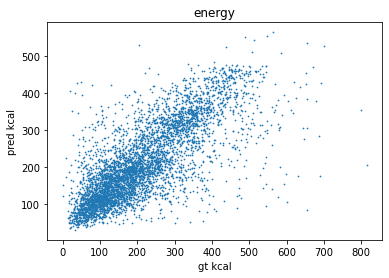

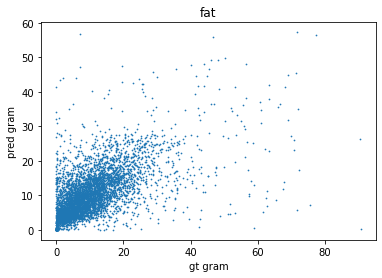

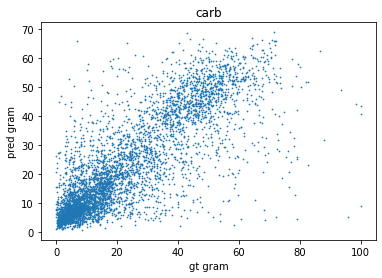

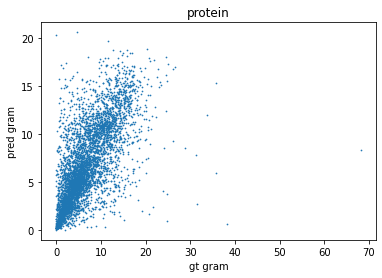

In [20]:
import matplotlib.pyplot as plt

for nutr_name in gts.keys():
    cc = np.corrcoef(gts[nutr_name],preds[nutr_name])[0,1]
    print(f'{cc:.04f}')
    plt.figure()
    plt.scatter(gts[nutr_name],preds[nutr_name],s=0.5)
    if nutr_name == 'energy':
        plt.xlabel('gt kcal')
        plt.ylabel('pred kcal')
    else:
        plt.xlabel('gt gram')
        plt.ylabel('pred gram')
    plt.title(nutr_name)

In [2]:
with open('/home/parinayok/nutr1m/data_crawl/food.com_nutr_g_per_recipe.json') as f:
    nutr_per_recipes = json.load(f)

In [5]:
gts = {
    'energy': [],
    'fat': [],
    'carb': [],
    'protein': [],
    'ash': [],
    'water': [],
}

for recipe_id, nutr in nutr_per_recipes.items():
    for nutr_name in gts.keys():
        gts[nutr_name].append(nutr[nutr_name])

In [6]:
for nutr_name, nutr in gts.items():
    print(nutr_name)
    print(np.array(nutr).std())

energy
122.4648256081543
fat
10.23826289333846
carb
17.681021516831
protein
4.640681233460239
ash
3.380124517788995
water
22.4804387326897
